In [440]:
import numpy as np, pandas as pd

In [441]:
pd.set_option("display.max_columns", None) #Mengubah settingan default agar kolom terlihat semua tanpa ada ter skip '...'

In [442]:
df = pd.read_csv('dataset/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [444]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [445]:
kolom_kosong = ['SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulaTerakhir','JumlahKetidakHadiran','IkutProgramLOP','AlasanResign']

In [446]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


In [447]:
df.describe(exclude=np.number)

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,221,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,132,2,12,17,198


# Handling Missing Value

In [448]:
#Mengisi kolom skor kepuasan pegawai dengan median yang robust terhadap outlier
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True) 

In [449]:
#Mengisi kolom Jumlah Keikutsertaan Project pegawai dengan median yang robust terhadap outlier
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)

In [450]:
#Mengisi kolom Jumlah Keterlambatan dengan median yang robust terhadap outlier
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)

In [451]:
#Mengisi kolom Jumlah Ketidakhadiran dengan median yang robust terhadap outlier
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)

In [452]:
#Melakukan drop pada IkutProgram LOP karena sebagian besar data mengalami missing/null value
df.drop('IkutProgramLOP', axis=1, inplace=True)

In [453]:
#Melakukan fillna pada alasan resign menggunakan alasan mayoritas karena data bersifat kategorik
df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)

#Sebaiknya data Alasan Resign diisi dengan alasan kebanyakan pada profesi pekerjaan di setiap baris, dengan menggunakan fungsi aggregasi mode pada setiap kolom yang kosong.

In [454]:
print('Data setelah dihandling fillna\n\n',
      df.isna().sum())

Data setelah dihandling fillna

 Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: 

In [455]:
#Pengecekan kolom 'PernahBekerja' karena data bertype string.
df['PernahBekerja'].unique() 

array(['1', 'yes'], dtype=object)

In [456]:
#Handling nya dilakukan penggantian angka 1 menjadi 'no' untuk membuat data menjadi string dan binary

In [457]:
df['PernahBekerja'] = df['PernahBekerja'].map({
    '1' : 'no',
   'yes' : 'yes'
})

In [458]:
print("Setelah dilakukan handling dengan cara mengubah dari angka 1 menjadi 'no', maka nilai uniknya adalah \n", df['PernahBekerja'].unique())

Setelah dilakukan handling dengan cara mengubah dari angka 1 menjadi 'no', maka nilai uniknya adalah 
 ['no' 'yes']


In [459]:
#tanggal = df[['TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan','TanggalResign']]

In [460]:
#Mengubah data menjadi bertype datetime untuk dilakukan ekstraksi
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])


#df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

In [461]:
#Melihat kenapa kolom 'TanggalResign' tidak dapat diubah menjadi type datetime
df['TanggalResign'].describe()

count     287
unique     53
top         -
freq      198
Name: TanggalResign, dtype: object

In [462]:
#Menghandle Tanggal resign dengan memasukkan errors =coerce, artinya data yang tidak dapat diubah akan dihapus (menjadi NaN Value)
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

In [463]:
print('After Handling', df['TanggalResign'].describe())

After Handling count                      89
unique                     52
top       2017-11-15 00:00:00
freq                        9
first     2013-05-30 00:00:00
last      2020-09-27 00:00:00
Name: TanggalResign, dtype: object


Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


# Aggregasi jumlah kayawan masuk dan keluar

In [464]:
#Extract Tahun Hiring dan Resign
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year

In [465]:
#Tanggal resign yang mengandung NaN Value adalah karyawan yang belum resign, dihandle dengan fillna 
df['TanggalResign'] = df['TanggalResign'].fillna('Belum Resign')

In [466]:
kolom = ['TahunHiring','TahunResign','Total']

In [467]:
#hiring_resign

In [468]:
hiring = df.groupby(['TahunHiring']).agg({'Username' :'count'})
hiring = hiring.reset_index()
hiring.columns=(['Tahun','JumlahHiring'])
hiring

,Tahun,JumlahHiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [469]:
resign = df.groupby(['TahunResign']).agg({'Username' :'count'})
resign = resign.reset_index()
resign.columns=(['Tahun','JumlahResign'])
resign

,Tahun,JumlahResign
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


In [470]:
#Melakukan penggabungan antara karyawan resign dan karyawan hiring
hiring_resign = pd.merge(hiring, resign, on='Tahun', how='outer')

In [471]:
hiring_resign

,Tahun,JumlahHiring,JumlahResign
0,2006.0,1.0,NaN
1,2007.0,2.0,NaN
2,2008.0,2.0,NaN
3,2009.0,7.0,NaN
4,2010.0,8.0,NaN
5,2011.0,76.0,NaN
6,2012.0,41.0,NaN
7,2013.0,43.0,5.0
8,2014.0,56.0,12.0
9,2015.0,31.0,8.0


In [472]:
hiring_resign = hiring_resign.fillna(0)
hiring_resign

,Tahun,JumlahHiring,JumlahResign
0,2006.0,1.0,0.0
1,2007.0,2.0,0.0
2,2008.0,2.0,0.0
3,2009.0,7.0,0.0
4,2010.0,8.0,0.0
5,2011.0,76.0,0.0
6,2012.0,41.0,0.0
7,2013.0,43.0,5.0
8,2014.0,56.0,12.0
9,2015.0,31.0,8.0


In [473]:
hiring_resign['JumlahHiring']=hiring_resign['JumlahHiring'].astype(int)
hiring_resign['JumlahResign']=hiring_resign['JumlahResign'].astype(int)
hiring_resign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tahun         15 non-null     float64
 1   JumlahHiring  15 non-null     int32  
 2   JumlahResign  15 non-null     int32  
dtypes: float64(1), int32(2)
memory usage: 360.0 bytes


In [474]:
hiring_resign['JumlahHiringKumulatif'] = np.cumsum(hiring_resign['JumlahHiring'])

In [475]:
hiring_resign['JumlahResignKumulatif'] = np.cumsum(hiring_resign['JumlahResign'])

In [476]:
hiring_resign['JumlahKaryawanSaatIni'] = np.cumsum(hiring_resign['JumlahHiring']) - hiring_resign['JumlahResign']

In [477]:
hiring_resign['PerubahanJumlahKaryawan'] = hiring_resign['JumlahHiring'] - hiring_resign['JumlahResign']

In [478]:
#hiring_resign = hiring_resign.drop(('JumlahKaryawanKumulatif'), axis=1)
#hiring_resign = hiring_resign.drop(('JumlahResignKumulatif'), axis=1)
#hiring_resign = hiring_resign.drop(('PerubahanJumlahKaryawan'), axis=1)
#hiring_resign = hiring_resign.drop(('JumlahKaryawanSaatIni'), axis=1)

In [479]:
hiring_resign.head()

,Tahun,JumlahHiring,JumlahResign,JumlahHiringKumulatif,JumlahResignKumulatif,JumlahKaryawanSaatIni,PerubahanJumlahKaryawan
0,2006.0,1,0,1,0,1,1
1,2007.0,2,0,3,0,3,2
2,2008.0,2,0,5,0,5,2
3,2009.0,7,0,12,0,12,7
4,2010.0,8,0,20,0,20,8


In [480]:
#import matplotlib.pyplot as plt, seaborn as sns

In [481]:
import matplotlib.pyplot as plt, seaborn as sns

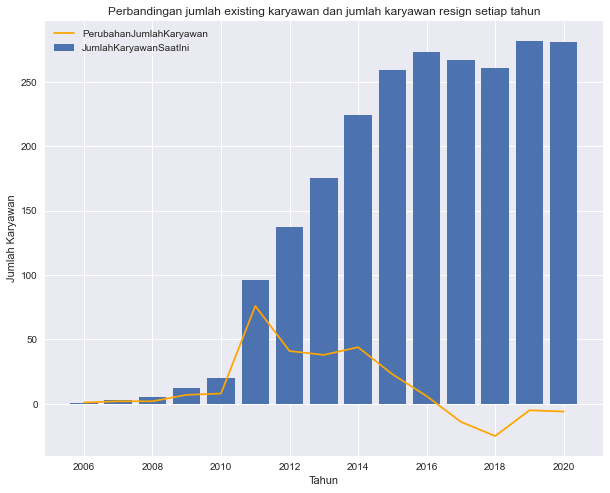

In [482]:
#Plot untuk mengetagui jumlah pertumbuhan karyawan dan jumlah resgn
plt.figure(figsize=(10,8))
plt.bar(hiring_resign['Tahun'], hiring_resign['JumlahKaryawanSaatIni'], label='JumlahKaryawanSaatIni')
plt.plot(hiring_resign['Tahun'], hiring_resign['PerubahanJumlahKaryawan'], color='orange', label='PerubahanJumlahKaryawan')
plt.title('Perbandingan jumlah existing karyawan dan jumlah karyawan resign setiap tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Karyawan')
plt.legend()

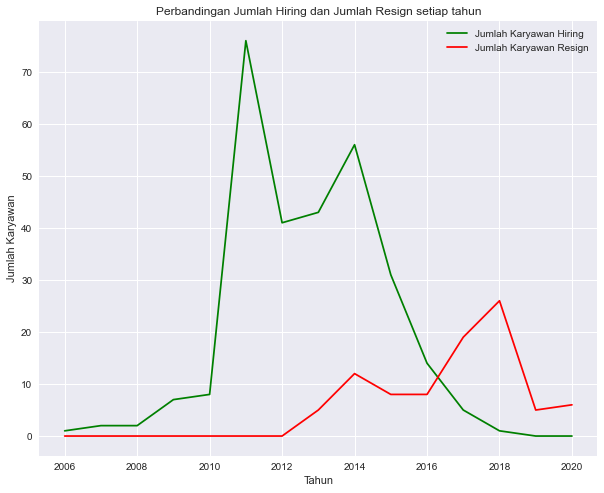

In [607]:
plt.figure(figsize=(10,8))
plt.plot(hiring_resign['Tahun'], hiring_resign['JumlahHiring'], color='green', label= 'Jumlah Karyawan Hiring')
plt.plot(hiring_resign['Tahun'], hiring_resign['JumlahResign'], color='red', label='Jumlah Karyawan Resign')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Karyawan')
plt.title('Perbandingan Jumlah Hiring dan Jumlah Resign setiap tahun')
plt.legend()

Interpretasi :

Jumlah karyawan mengalami penurunan pertama kali pada tahun 2016. Pada tahun ini perubahan jumlah karyawan adalah dibawah 0, artinya jumlah karyawan yang resign lebih banyak daripada karyawan yang masuk. Hal ini akan berdampak pada performance perusahaan karena ada beberapa posisi yang tidak akan terisi atau kosong. Sehingga diperlukan pendalaman untuk mengatahui alasan apa saja karyawan resign sehingga perusahaan dapat berbenah.
Kondisi ini cukup mengkhawatirkan mengingat jumlah karyawan resign lebih tinggi daripada karyawan hirinng(terjadi ketidakseimbangan) sehingga membuat perusahaan akan tidak sehat.

In [484]:
#import waterfallcharts

In [485]:
df['TahunResign'] = df['TahunResign'].fillna('Belum Resign')

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [487]:
df.AlasanResign.unique()

array(['masih_bekerja', 'toxic_culture', 'jam_kerja', 'ganti_karir',
       'tidak_bahagia', 'internal_conflict', 'Product Design (UI & UX)',
       'kejelasan_karir', 'tidak_bisa_remote', 'apresiasi', 'leadership'],
      dtype=object)

In [488]:
df_active = df[df['AlasanResign'] == 'masih_bekerja']
#df.groupby('Pekerjaan').agg({'Username':'count'})


In [489]:
alasannya = ['toxic_culture', 'jam_kerja', 'ganti_karir',
       'tidak_bahagia', 'internal_conflict', 'Product Design (UI & UX)',
       'kejelasan_karir', 'tidak_bisa_remote', 'apresiasi', 'leadership']
df_resign = df[df.AlasanResign.isin(alasannya)]


In [490]:
n_active = df_active.groupby('Pekerjaan').agg({'Username':'count'}).reset_index()
n_active.columns=(['Pekerjaan','JumlahActive'])
n_active

,Pekerjaan,JumlahActive
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [491]:
n_resign = df_resign.groupby('Pekerjaan').agg({'Username':'count'}).reset_index()
n_resign.columns=(['Pekerjaan','JumlahResign'])
n_resign

,Pekerjaan,JumlahResign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [492]:
jumlah_pekerjaan = pd.merge(n_active, n_resign, on='Pekerjaan', how='outer')
jumlah_pekerjaan = jumlah_pekerjaan.fillna(0)

In [493]:
jumlah_pekerjaan

,Pekerjaan,JumlahActive,JumlahResign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,0.0
3,Digital Product Manager,2,0.0
4,Machine Learning Engineer,2,0.0
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,0.0
7,Product Manager,11,6.0
8,Scrum Master,3,0.0
9,Software Architect,1,0.0


In [494]:
jumlah_pekerjaan['JumlahKaryawan'] = jumlah_pekerjaan['JumlahActive'] + jumlah_pekerjaan['JumlahResign']
jumlah_pekerjaan

,Pekerjaan,JumlahActive,JumlahResign,JumlahKaryawan
0,Data Analyst,8,8.0,16.0
1,Data Engineer,7,3.0,10.0
2,DevOps Engineer,3,0.0,3.0
3,Digital Product Manager,2,0.0,2.0
4,Machine Learning Engineer,2,0.0,2.0
5,Product Design (UI & UX),15,9.0,24.0
6,Product Design (UX Researcher),1,0.0,1.0
7,Product Manager,11,6.0,17.0
8,Scrum Master,3,0.0,3.0
9,Software Architect,1,0.0,1.0


In [495]:
jumlah_pekerjaan['PresentaseActive'] = jumlah_pekerjaan['JumlahActive'] / jumlah_pekerjaan['JumlahKaryawan'] * 100
jumlah_pekerjaan

,Pekerjaan,JumlahActive,JumlahResign,JumlahKaryawan,PresentaseActive
0,Data Analyst,8,8.0,16.0,50.000000
1,Data Engineer,7,3.0,10.0,70.000000
2,DevOps Engineer,3,0.0,3.0,100.000000
3,Digital Product Manager,2,0.0,2.0,100.000000
4,Machine Learning Engineer,2,0.0,2.0,100.000000
5,Product Design (UI & UX),15,9.0,24.0,62.500000
6,Product Design (UX Researcher),1,0.0,1.0,100.000000
7,Product Manager,11,6.0,17.0,64.705882
8,Scrum Master,3,0.0,3.0,100.000000
9,Software Architect,1,0.0,1.0,100.000000


In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

ax1 = sns.barplot(y = "Pekerjaan", 
                  x = "PresentaseActive", 
                  data = jumlah_pekerjaan.sort_values(["PresentaseActive"]))
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Divisi Pekerjaan berdasarkan Tingkat Bertahan (Tidak resign) dalam persen (%)')
plt.show()

In [496]:
#jumlah_pekerjaan.drop('PresentaseResign', axis=1, inplace=True)

In [497]:
import plotly.express as px

In [498]:
#4
#fig = px.sunburst(
#    jumlah_pekerjaan,
#    names='Pekerjaan',
#    parents='Pekerjaan',
#    values='PresentaseActive',
#)
#fig.show()

In [499]:
#5
#Jumlah divisi dengan tingkat resign tertinggi adalah Software Engineer(BackEnd and Front Ed)
soft_eng_max_resign  = ['Software Engineer (Back End)']
soft_eng_resign =df_resign[df_resign['Pekerjaan'].isin(soft_eng_max_resign)]
soft_eng_resign.shape

(28, 26)

In [500]:
soft_eng_resign

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
11,grizzledSnipe7,111354,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,CareerBuilder,1,5.0,0.0,5.0,2.0,+6289987666xxx,grizzledSnipe7992@outlook.com,Magister,no,tidak_bahagia,1989-07-18,2011-07-05,2016-02-06,2018-09-19 00:00:00,2011,2018.0
14,madWildfowl7,105507,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Selatan,Indeed,3,4.0,0.0,0.0,3.0,+6281965329xxx,madWildfowl7630@gmail.com,Sarjana,no,ganti_karir,1983-08-27,2011-06-27,2016-03-10,2019-04-06 00:00:00,2011,2019.0
28,guiltySnail8,106577,Belum_menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Selatan,Employee_Referral,3,3.0,0.0,0.0,16.0,+6281228852xxx,guiltySnail8568@outlook.com,Sarjana,no,ganti_karir,1965-02-02,2013-11-11,2020-01-24,2015-06-15 00:00:00,2013,2015.0
49,needfulCardinal0,105390,Bercerai,Wanita,Outsource,Software Engineer (Back End),Senior_level,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,19.0,+6281206622xxx,needfulCardinal0741@proton.com,Magister,no,tidak_bahagia,1989-09-01,2014-07-07,2020-02-27,2015-01-07 00:00:00,2014,2015.0
65,boastfulLlama7,110454,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Pusat,Google_Search,3,3.0,5.0,0.0,4.0,+6281290991xxx,boastfulLlama7262@yahoo.com,Sarjana,no,tidak_bahagia,1966-11-22,2011-08-15,2020-01-21,2018-06-08 00:00:00,2011,2018.0
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,2,5.0,5.0,0.0,9.0,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,no,internal_conflict,1986-09-01,2014-09-29,2020-01-18,2019-06-06 00:00:00,2014,2019.0
89,wingedPoultry2,105419,Bercerai,Wanita,FullTime,Software Engineer (Back End),Mid_level,Sangat_bagus,Jakarta Pusat,Google_Search,3,4.0,0.0,0.0,6.0,+6283263626xxx,wingedPoultry2087@hotmail.com,Magister,no,internal_conflict,1990-08-24,2012-04-02,2014-03-04,2018-05-17 00:00:00,2012,2018.0
93,gloomyClam6,100919,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Timur,Indeed,2,5.0,0.0,0.0,9.0,+6285908172xxx,gloomyClam6755@gmail.com,Doktor,no,jam_kerja,1988-09-14,2014-08-18,2020-01-30,2015-06-24 00:00:00,2014,2015.0
103,sincereSeafowl4,110793,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_kurang,Jakarta Barat,Diversity_Job_Fair,3,4.0,0.0,0.0,2.0,+6285756514xxx,sincereSeafowl4749@hotmail.com,Sarjana,no,jam_kerja,1970-05-15,2011-11-07,2017-04-29,2018-11-15 00:00:00,2011,2018.0
112,joyfulVenison6,101389,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Mid_level,Sangat_bagus,Jakarta Utara,Google_Search,3,3.0,0.0,0.0,15.0,+6283227259xxx,joyfulVenison6060@gmail.com,Sarjana,no,ganti_karir,1981-11-23,2007-11-05,2020-02-25,2013-05-30 00:00:00,2007,2013.0


In [501]:
se_resign_breakdown = soft_eng_resign.groupby(['JenjangKarir','PerformancePegawai','AlasanResign']).agg({'Username':'count'}).reset_index()

In [502]:
se_resign_breakdown

,JenjangKarir,PerformancePegawai,AlasanResign,Username
0,Freshgraduate_program,Bagus,kejelasan_karir,1
1,Freshgraduate_program,Bagus,toxic_culture,1
2,Freshgraduate_program,Biasa,ganti_karir,2
3,Freshgraduate_program,Biasa,jam_kerja,1
4,Freshgraduate_program,Biasa,kejelasan_karir,1
5,Freshgraduate_program,Biasa,leadership,1
6,Freshgraduate_program,Biasa,tidak_bisa_remote,1
7,Freshgraduate_program,Kurang,ganti_karir,1
8,Freshgraduate_program,Kurang,jam_kerja,1
9,Freshgraduate_program,Kurang,tidak_bahagia,1


In [503]:
se_resign_breakdown.describe(exclude=np.number)

,JenjangKarir,PerformancePegawai,AlasanResign
count,24,24,24
unique,3,5,9
top,Freshgraduate_program,Biasa,jam_kerja
freq,13,8,5


In [504]:
#Plot

In [505]:
#Interpretasi

Interpretasi :

Jenis pekerjaan yang memiliki resign tertinggi adalah pekerjaan Software Enginner yang memiliki jenjang karir Fresh Graduate. Kebanyakan alasan adalah alasan yang berkaitan pengembangan perusahaan dan culture perusahaan seperti kejelasan karir, toxic culture, dan dan jam kerja. 

Rekomendasi :

Perusahaan bisa mengakomodir alasan alasan dengan sesekali mengadakan kegiatan yang sifatnya pengembangan diri, sistem kejalasan karir, dan handle toxic culture pada karyawan sehingga alasan alasan pribadi semacam ini tidak muncul di kemudian hari.

In [506]:
df2 = df.copy()

In [507]:
#Check Missing value
df2.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
TahunHiring                           0


In [508]:
#Check Data Duplicated
df2.duplicated().sum()

0

In [509]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [510]:
#Melakukan droping pada beberapa fitur yang tidak berkaitan dengan model 
kolom_drop = ['Username','EnterpriseID','NomorHP','Email']
df2.drop(kolom_drop, axis=1, inplace=True)

In [511]:
#Melakukan droping pada beberapa fitur yang tidak berkaitan dengan model 
df2.drop('TanggalPenilaianKaryawan', axis =1, inplace=True)

In [512]:
#Melakukan droping pada beberapa fitur yang tidak berkaitan dengan model dan mengurangi problem gender bias, racism, dan diskriminatif
kolom_drop2= ['JenisKelamin', 'AsalDaerah', 'HiringPlatform', 'PernahBekerja']
df2.drop(kolom_drop2, axis=1, inplace=True)

# Feature Encoding

In [513]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [514]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()

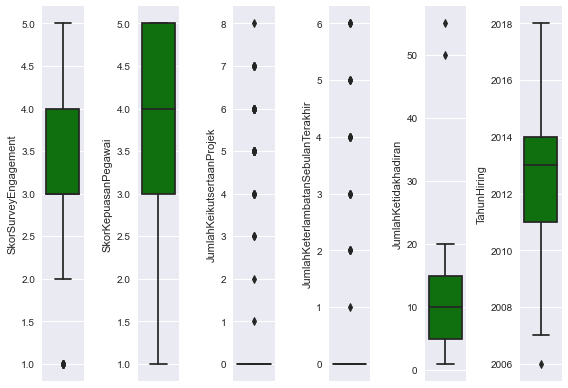

In [515]:
#Memisahkan data kategorik dan numerik untuk dilakukan cek outlier
nums = df2.select_dtypes(include=np.number).columns #data2 numerik berdasar kolom
cats = df2.select_dtypes(exclude=np.number).columns #data2 categorik berdasar kolom
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

In [516]:
df2.shape

(287, 17)

In [517]:
#Membuat target dan menentukan karyawan resign ataukah tidak
df2['is_resign'] = np.where(df2['TahunResign'] == 'Belum Resign', 0, 1)

# 0 bernilai tidak resign sedangkan 1 bernilai positif resign)

In [518]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    object        
 1   StatusKepegawaian                   287 non-null    object        
 2   Pekerjaan                           287 non-null    object        
 3   JenjangKarir                        287 non-null    object        
 4   PerformancePegawai                  287 non-null    object        
 5   SkorSurveyEngagement                287 non-null    int64         
 6   SkorKepuasanPegawai                 287 non-null    float64       
 7   JumlahKeikutsertaanProjek           287 non-null    float64       
 8   JumlahKeterlambatanSebulanTerakhir  287 non-null    float64       
 9   JumlahKetidakhadiran                287 non-null    float64       
 10  TingkatPendidikan         

In [519]:
cats

Index(['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir',
       'PerformancePegawai', 'TingkatPendidikan', 'AlasanResign',
       'TanggalLahir', 'TanggalHiring', 'TanggalResign', 'TahunResign'],
      dtype='object')

Handle Categoric By: 
#Menurut Aturan

Label Encoding (for ordinal) =   JenjangKarir, PerformancePegawai
One Hot Encoding (for nominal) - Get dummies =  Status Pernikahan, StatusKepegawaian, Pekerjaan, HiringPlatform, AlasanResign
Tetap = SkorSurveyEngagement, SKorKepuasan

Feature Engineering :
Umur Hiring
Lama Bekerja

## One Hot Encoder

In [520]:
df2.columns

Index(['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir',
       'PerformancePegawai', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'AlasanResign',
       'TanggalLahir', 'TanggalHiring', 'TanggalResign', 'TahunHiring',
       'TahunResign', 'is_resign'],
      dtype='object')

In [521]:
#OneHot ENcoder menggunakan df_dummies pandas
one_hot_label = ['StatusPernikahan','StatusKepegawaian','Pekerjaan', 'AlasanResign']
df2_lab_enc = pd.get_dummies(df2, columns=one_hot_label)

## Label Hot Encoder

In [522]:
label_enc_kolom = ['JenjangKarir', 'PerformancePegawai', 'PernahBekerja','TingkatPendidikan']

In [523]:
df2.JenjangKarir.unique()

array(['Freshgraduate_program', 'Senior_level', 'Mid_level'], dtype=object)

In [524]:
df2_lab_enc['JenjangKarir'] = df2_lab_enc['JenjangKarir'].map(
    {'Freshgraduate_program':1,
    'Mid_level':2,
    'Senior_level':3})

In [525]:
df2_lab_enc.PerformancePegawai.unique()

array(['Sangat_bagus', 'Sangat_kurang', 'Bagus', 'Biasa', 'Kurang'],
      dtype=object)

In [526]:
df2_lab_enc['PerformancePegawai'] = df2_lab_enc['PerformancePegawai'].map(
    {'Sangat_kurang':1,
     'Kurang':2,
     'Biasa':3,
     'Bagus':4,
    'Sangat_bagus':5   })

In [527]:
df2_lab_enc['TingkatPendidikan'].unique()

array(['Magister', 'Sarjana', 'Doktor'], dtype=object)

In [528]:
df2_lab_enc['TingkatPendidikan'] = df2_lab_enc['TingkatPendidikan'].map(
    {'Sarjana':1, 'Magister':2, 'Doktor':3})

In [529]:
df2_lab_enc[['TanggalResign', 'TahunResign']].describe()

,TanggalResign,TahunResign
count,287,287
unique,53,9
top,Belum Resign,Belum Resign
freq,198,198


In [530]:
df2_lab_enc[df2_lab_enc['TanggalResign'].isin(['Belum Resign'])]

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,TanggalLahir,TanggalHiring,TanggalResign,TahunHiring,TahunResign,is_resign,StatusPernikahan_-,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_masih_bekerja,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture
0,1,5,4,4.0,0.0,0.0,9.0,2,1972-07-01,2011-01-10,Belum Resign,2011,Belum Resign,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,4,3,3.0,0.0,4.0,6.0,1,1979-11-24,2014-02-17,Belum Resign,2014,Belum Resign,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,3,3,3,4.0,6.0,0.0,10.0,1,1980-05-12,2016-10-02,Belum Resign,2016,Belum Resign,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6,1,3,2,3.0,4.0,0.0,19.0,1,1979-05-24,2014-11-10,Belum Resign,2014,Belum Resign,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,3,2,2,5.0,0.0,0.0,4.0,2,1983-08-24,2013-07-08,Belum Resign,2013,Belum Resign,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,4,3,4.0,0.0,0.0,13.0,3,1980-04-18,2013-07-08,Belum Resign,2013,Belum Resign,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
280,2,4,3,5.0,7.0,0.0,16.0,1,1984-09-16,2014-11-10,Belum Resign,2014,Belum Resign,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
281,1,5,2,5.0,7.0,0.0,15.0,1,1983-09-04,2017-02-15,Belum Resign,2017,Belum Resign,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
282,2,4,2,5.0,0.0,0.0,16.0,1,1973-12-08,2011-09-26,Belum Resign,2011,Belum Resign,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [531]:
#df2_lab_enc['TanggalResign'].astype(int)

In [532]:
#Mengubah data Belum Resign diasumsikan menjadi 2023 agar semua data dapat diubah menjadi integer
df2_lab_enc['TahunResign'].replace({'Belum Resign': 2023}, inplace=True)

In [533]:
df2_lab_enc['TahunResign'].replace({2023: 2025}, inplace=True)

In [534]:
df2_lab_enc['TahunLahir'] = df2_lab_enc['TanggalLahir'].dt.year #Feature Engineering 

In [535]:
df2_lab_enc['UsiaHired'] = df2_lab_enc['TahunHiring'] - df2_lab_enc['TahunLahir']
df2_lab_enc['LamaBekerja'] = df2_lab_enc['TahunResign'] - df2_lab_enc['TahunHiring']


In [536]:
df2_lab_enc[['TahunHiring','TahunResign','LamaBekerja','UsiaHired']]

,TahunHiring,TahunResign,LamaBekerja,UsiaHired
0,2011,2025.0,14.0,39
1,2014,2018.0,4.0,30
2,2011,2014.0,3.0,37
3,2014,2025.0,11.0,35
4,2013,2018.0,5.0,39
...,...,...,...,...
282,2011,2025.0,14.0,38
283,2013,2017.0,4.0,39
284,2013,2018.0,5.0,44
285,2011,2018.0,7.0,30


In [537]:
df2_lab_enc[df2_lab_enc['LamaBekerja'] < 0] #Terdapat missinput sehingga data ini akan dihapus

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,TanggalLahir,TanggalHiring,TanggalResign,TahunHiring,TahunResign,is_resign,StatusPernikahan_-,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_masih_bekerja,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture,TahunLahir,UsiaHired,LamaBekerja
108,1,3,4,4.0,0.0,0.0,10.0,1,1976-09-22,2015-03-30,2014-08-19 00:00:00,2015,2014.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1976,39,-1.0
207,2,5,4,3.0,5.0,0.0,17.0,1,1972-11-21,2017-01-07,2013-05-30 00:00:00,2017,2013.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1972,45,-4.0


In [538]:
#Lama bekerja harus lebih besar dari 0 tahun (hitungan bulan) karena dipencarian sebelumnya ada 2 data yang lama bekerja nya justru -2
df2_lab_enc = df2_lab_enc[df2_lab_enc['LamaBekerja'] >=0 ] #Di assign ulang dan di filter bahwa kolom lama bekerja harus lebih besar dari 0

In [539]:
hapus_kolom =['TanggalLahir', 'TanggalHiring','TanggalResign','TahunLahir', 'TahunHiring','TahunResign']

In [540]:
df2_lab_enc.drop(hapus_kolom, axis=1, inplace=True)

In [541]:
df2_lab_enc.keys()

Index(['JenjangKarir', 'PerformancePegawai', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'is_resign', 'StatusPernikahan_-',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource', 'Pekerjaan_Data Analyst',
       'Pekerjaan_Data Engineer', 'Pekerjaan_DevOps Engineer',
       'Pekerjaan_Digital Product Manager',
       'Pekerjaan_Machine Learning Engineer',
       'Pekerjaan_Product Design (UI & UX)',
       'Pekerjaan_Product Design (UX Researcher)', 'Pekerjaan_Product Manager',
       'Pekerjaan_Scrum Master', 'Pekerjaan_Software Architect',
       'Pekerjaan_Software Engineer (Android)',
       'Pekerjaan_Software Engineer (Back End)',
       'Pekerjaan_Software Enginee

In [542]:
df2_lab_enc.drop('AlasanResign_masih_bekerja', axis=1, inplace=True)

In [543]:
df2_lab_enc.head()

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,is_resign,StatusPernikahan_-,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture,UsiaHired,LamaBekerja
0,1,5,4,4.0,0.0,0.0,9.0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,39,14.0
1,1,1,4,4.0,4.0,0.0,3.0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30,4.0
2,1,4,4,3.0,0.0,0.0,11.0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,37,3.0
3,1,4,3,3.0,0.0,4.0,6.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35,11.0
4,1,4,3,3.0,0.0,0.0,11.0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,39,5.0


In [544]:
df2_lab_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   JenjangKarir                              285 non-null    int64  
 1   PerformancePegawai                        285 non-null    int64  
 2   SkorSurveyEngagement                      285 non-null    int64  
 3   SkorKepuasanPegawai                       285 non-null    float64
 4   JumlahKeikutsertaanProjek                 285 non-null    float64
 5   JumlahKeterlambatanSebulanTerakhir        285 non-null    float64
 6   JumlahKetidakhadiran                      285 non-null    float64
 7   TingkatPendidikan                         285 non-null    int64  
 8   is_resign                                 285 non-null    int32  
 9   StatusPernikahan_-                        285 non-null    uint8  
 10  StatusPernikahan_Belum_menikah        

<AxesSubplot:xlabel='is_resign', ylabel='count'>

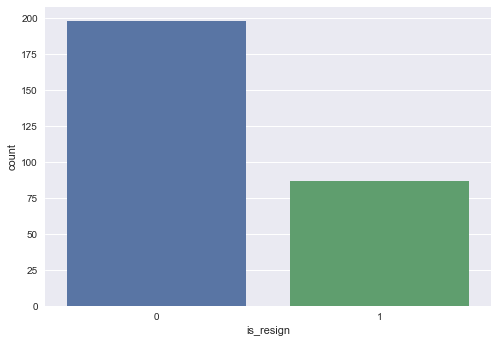

In [545]:
sns.countplot(x='is_resign', data=df2_lab_enc)
#1 menandakan resign
#0 menandakan belum atau tidak resign

## Scaling menggunakan MInMAxScaler

In [546]:
df2_lab_enc.head()

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,is_resign,StatusPernikahan_-,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture,UsiaHired,LamaBekerja
0,1,5,4,4.0,0.0,0.0,9.0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,39,14.0
1,1,1,4,4.0,4.0,0.0,3.0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30,4.0
2,1,4,4,3.0,0.0,0.0,11.0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,37,3.0
3,1,4,3,3.0,0.0,4.0,6.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35,11.0
4,1,4,3,3.0,0.0,0.0,11.0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,39,5.0


In [547]:
df2_lab_enc.describe()

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,is_resign,StatusPernikahan_-,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture,UsiaHired,LamaBekerja
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,1.578947,3.487719,3.094737,3.908772,1.157895,0.414035,10.417544,1.473684,0.305263,0.010526,0.459649,0.164912,0.168421,0.196491,0.754386,0.014035,0.231579,0.052632,0.035088,0.010526,0.007018,0.007018,0.084211,0.003509,0.059649,0.010526,0.003509,0.084211,0.382456,0.249123,0.010526,0.014035,0.007018,0.049123,0.014035,0.056140,0.038596,0.028070,0.028070,0.038596,0.031579,34.024561,9.824561
std,0.763318,1.217835,0.835907,0.906992,2.281196,1.277023,6.842625,0.647456,0.461329,0.102236,0.499246,0.371754,0.374898,0.398043,0.431208,0.117842,0.422583,0.223690,0.184325,0.102236,0.083623,0.083623,0.278192,0.059235,0.237252,0.102236,0.059235,0.278192,0.486842,0.433266,0.102236,0.117842,0.083623,0.216505,0.117842,0.230597,0.192970,0.165464,0.165464,0.192970,0.175184,8.857405,4.338344
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,1.000000,3.000000,3.000000,3.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,7.000000
50%,1.000000,4.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,11.000000
75%,2.000000,5.000000,4.000000,5.000000,0.000000,0.000000,15.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,13.000000
max,3.000000,5.000000,

In [548]:
kolom_scaler = df2_lab_enc

In [549]:
kolom_scaler

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,is_resign,StatusPernikahan_-,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture,UsiaHired,LamaBekerja
0,1,5,4,4.0,0.0,0.0,9.0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,39,14.0
1,1,1,4,4.0,4.0,0.0,3.0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30,4.0
2,1,4,4,3.0,0.0,0.0,11.0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,37,3.0
3,1,4,3,3.0,0.0,4.0,6.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35,11.0
4,1,4,3,3.0,0.0,0.0,11.0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,39,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2,4,2,5.0,0.0,0.0,16.0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,14.0
283,1,3,4,5.0,0.0,0.0,11.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,39,4.0
284,3,3,2,5.0,0.0,0.0,17.0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,44,5.0
285,2,4,4,5.0,0.0,0.0,20.0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,30,7.0


In [551]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
fit_kolom= mm.fit_transform(kolom_scaler)
df_scale = pd.DataFrame(fit_kolom, columns=(['JenjangKarir', 'PerformancePegawai', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'is_resign', 'StatusPernikahan_-',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource', 'Pekerjaan_Data Analyst',
       'Pekerjaan_Data Engineer', 'Pekerjaan_DevOps Engineer',
       'Pekerjaan_Digital Product Manager',
       'Pekerjaan_Machine Learning Engineer',
       'Pekerjaan_Product Design (UI & UX)',
       'Pekerjaan_Product Design (UX Researcher)', 'Pekerjaan_Product Manager',
       'Pekerjaan_Scrum Master', 'Pekerjaan_Software Architect',
       'Pekerjaan_Software Engineer (Android)',
       'Pekerjaan_Software Engineer (Back End)',
       'Pekerjaan_Software Engineer (Front End)',
       'Pekerjaan_Software Engineer (iOS)',
       'AlasanResign_Product Design (UI & UX)', 'AlasanResign_apresiasi',
       'AlasanResign_ganti_karir', 'AlasanResign_internal_conflict',
       'AlasanResign_jam_kerja', 'AlasanResign_kejelasan_karir',
       'AlasanResign_leadership', 'AlasanResign_tidak_bahagia', 'AlasanResign_tidak_bisa_remote',
       'AlasanResign_toxic_culture', 'UsiaHired', 'LamaBekerja']))

In [552]:
kolom_scaler.columns

Index(['JenjangKarir', 'PerformancePegawai', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'is_resign', 'StatusPernikahan_-',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource', 'Pekerjaan_Data Analyst',
       'Pekerjaan_Data Engineer', 'Pekerjaan_DevOps Engineer',
       'Pekerjaan_Digital Product Manager',
       'Pekerjaan_Machine Learning Engineer',
       'Pekerjaan_Product Design (UI & UX)',
       'Pekerjaan_Product Design (UX Researcher)', 'Pekerjaan_Product Manager',
       'Pekerjaan_Scrum Master', 'Pekerjaan_Software Architect',
       'Pekerjaan_Software Engineer (Android)',
       'Pekerjaan_Software Engineer (Back End)',
       'Pekerjaan_Software Enginee

In [553]:
df_scale

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,is_resign,StatusPernikahan_-,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture,UsiaHired,LamaBekerja
0,0.0,1.00,0.75,0.75,0.0,0.000000,0.148148,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.736842
1,0.0,0.00,0.75,0.75,0.5,0.000000,0.037037,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.250000,0.210526
2,0.0,0.75,0.75,0.50,0.0,0.000000,0.185185,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.409091,0.157895
3,0.0,0.75,0.50,0.50,0.0,0.666667,0.092593,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.578947
4,0.0,0.75,0.50,0.50,0.0,0.000000,0.185185,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.5,0.75,0.25,1.00,0.0,0.000000,0.277778,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.431818,0.736842
281,0.0,0.50,0.75,1.00,0.0,0.000000,0.185185,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.210526
282,1.0,0.50,0.25,1.00,0.0,0.000000,0.296296,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568182,0.263158
283,0.5,0.75,0.75,1.00,0.0,0.000000,0.351852,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.250000,0.368421


# Modelling 

In [554]:
df_model = df_scale.copy()

In [555]:
import time

In [556]:
df_model.columns

Index(['JenjangKarir', 'PerformancePegawai', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'is_resign', 'StatusPernikahan_-',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource', 'Pekerjaan_Data Analyst',
       'Pekerjaan_Data Engineer', 'Pekerjaan_DevOps Engineer',
       'Pekerjaan_Digital Product Manager',
       'Pekerjaan_Machine Learning Engineer',
       'Pekerjaan_Product Design (UI & UX)',
       'Pekerjaan_Product Design (UX Researcher)', 'Pekerjaan_Product Manager',
       'Pekerjaan_Scrum Master', 'Pekerjaan_Software Architect',
       'Pekerjaan_Software Engineer (Android)',
       'Pekerjaan_Software Engineer (Back End)',
       'Pekerjaan_Software Enginee

In [558]:
x_data =df_model[['JenjangKarir', 'PerformancePegawai', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'StatusPernikahan_-',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource', 'Pekerjaan_Data Analyst',
       'Pekerjaan_Data Engineer', 'Pekerjaan_DevOps Engineer',
       'Pekerjaan_Digital Product Manager',
       'Pekerjaan_Machine Learning Engineer',
       'Pekerjaan_Product Design (UI & UX)',
       'Pekerjaan_Product Design (UX Researcher)', 'Pekerjaan_Product Manager',
       'Pekerjaan_Scrum Master', 'Pekerjaan_Software Architect',
       'Pekerjaan_Software Engineer (Android)',
       'Pekerjaan_Software Engineer (Back End)',
       'Pekerjaan_Software Engineer (Front End)',
       'Pekerjaan_Software Engineer (iOS)',
       'AlasanResign_Product Design (UI & UX)', 'AlasanResign_apresiasi',
       'AlasanResign_ganti_karir', 'AlasanResign_internal_conflict',
       'AlasanResign_jam_kerja', 'AlasanResign_kejelasan_karir',
       'AlasanResign_leadership', 
       'AlasanResign_tidak_bahagia', 'AlasanResign_tidak_bisa_remote',
       'AlasanResign_toxic_culture', 'UsiaHired', 'LamaBekerja']]

In [559]:
y_data = df_model['is_resign']

<AxesSubplot:xlabel='is_resign', ylabel='count'>

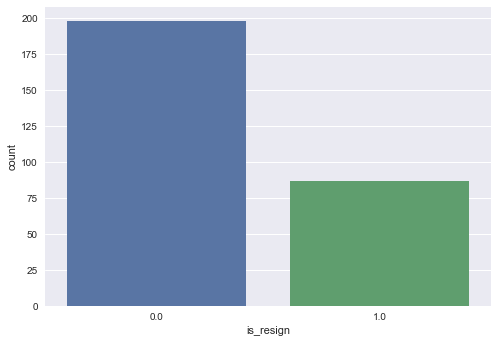

In [560]:
sns.countplot(x='is_resign', data=df_model)
#1 menandakan resign
#0 menandakan belum atau tidak resign

In [561]:
df_model.shape

(285, 43)

In [562]:
#Split data menjadi 80:20 (Train:Test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, 
                                                   random_state=42)

In [563]:
x_train.shape, x_test.shape, x_data.shape

((228, 42), (57, 42), (285, 42))

In [565]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print('Before', counter)

#oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter_b = Counter(y_train_sm)
print('After', counter_b)

Before Counter({0.0: 155, 1.0: 73})
After Counter({0.0: 155, 1.0: 155})


5 Model MAchine LEarning
- Logistic Regression
- KNN
- SVM
- Naive Bayes
- Random Forest

## Logistic Regression

In [566]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [567]:
start = time.time()
y_pred_train = lr.predict(x_train_sm) #ypredict data training
end = time.time()
rt_lr = 'Running time Logistic Regression Model', end-start
print(rt_lr)

('Running time Logistic Regression Model', 0.003273487091064453)


In [568]:
#Evaluasi model menggunakan metric accuracy score
from sklearn.metrics import accuracy_score
print('Score accuracy model logistic regression adalah', accuracy_score(y_train_sm, y_pred_train))

Score accuracy model logistic regression adalah 1.0


In [569]:
#Evaluasi menggunakan classification report
from sklearn.metrics import classification_report
print('Logistic Regression Classification Report\n', classification_report(y_train_sm, y_pred_train))

Logistic Regression Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       155
         1.0       1.00      1.00      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


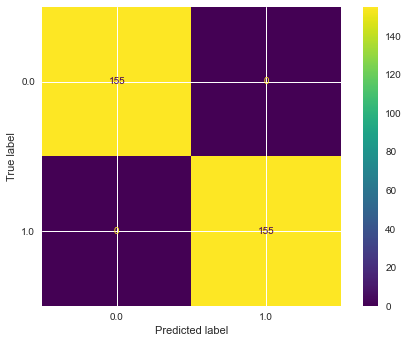

In [570]:
#Evaluasi Logistic Regression menggunakan confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, x_train_sm, y_train_sm)  
plt.show()

In [571]:
#y Predict Datatest
y_test_pred_lr = lr.predict(x_test)
print('Score accuracy model logistic regression(data test) adalah', accuracy_score(y_test, y_test_pred_lr))

Score accuracy model logistic regression(data test) adalah 1.0


## KNN Models

In [572]:
from sklearn.neighbors import KNeighborsClassifier

In [573]:
knn = KNeighborsClassifier()

In [574]:
knn.fit(x_train_sm, y_train_sm)

KNeighborsClassifier()

In [575]:
start = time.time()
y_pred_train_knn = knn.predict(x_train_sm)
end = time.time()
rt_KNN = 'Running time KNN Model', end-start
print(rt_KNN)


('Running time KNN Model', 0.0310976505279541)


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [576]:
#Evaluasi model menggunakan metric accuracy score
print('Score accuracy KNN adalah', accuracy_score(y_train_sm, y_pred_train_knn))

Score accuracy KNN adalah 0.9258064516129032


In [577]:
#Evaluasi menggunakan classification report
from sklearn.metrics import classification_report
print('KNN Classification Report\n', classification_report(y_train_sm, y_pred_train_knn))

KNN Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       155
         1.0       0.95      0.90      0.92       155

    accuracy                           0.93       310
   macro avg       0.93      0.93      0.93       310
weighted avg       0.93      0.93      0.93       310



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


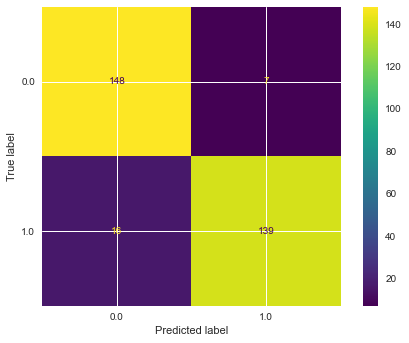

In [578]:
#Evaluasi KNN menggunakan confusion matrix
#from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_train_sm, y_train_sm)  
plt.show()

In [579]:
#y Predict Datatest
y_test_pred_knn = knn.predict(x_test)
print('Score accuracy model KNN (data test) adalah', accuracy_score(y_test, y_test_pred_knn))

Score accuracy model KNN (data test) adalah 0.7368421052631579


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


## SVM 

In [580]:
from sklearn import svm
svm_clf = svm.SVC()

In [581]:
svm_clf.fit(x_train_sm, y_train_sm)

SVC()

In [582]:
start = time.time()
y_pred_train_svm = svm_clf.predict(x_train_sm)
end = time.time()
rt_svm = 'Running time  svm Model', end-start
print(rt_svm)

('Running time  svm Model', 0.011138439178466797)


In [583]:
#Evaluasi model menggunakan metric accuracy score
print('Score accuracy svm  adalah', accuracy_score(y_train_sm, y_pred_train_svm))

Score accuracy svm  adalah 1.0


In [584]:
#Evaluasi menggunakan classification report
#from sklearn.metrics import classification_report

print('SVM Classification Report\n', classification_report(y_train_sm, y_pred_train_svm))

SVM Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       155
         1.0       1.00      1.00      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



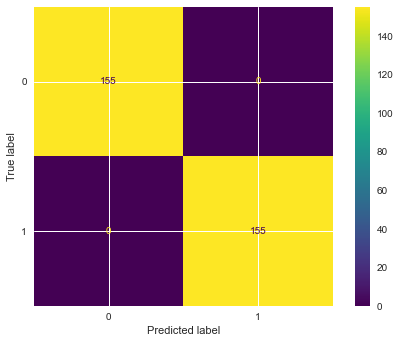

In [585]:
#Evaluasi KNN menggunakan confusion matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_svm = confusion_matrix(y_train_sm, y_pred_train)
ConfusionMatrixDisplay(cm_svm).plot()

In [586]:
#y Predict Datatest
y_test_pred_svm = svm_clf.predict(x_test)
print('Score accuracy model KNN (data test) adalah', accuracy_score(y_test, y_test_pred_svm))

Score accuracy model KNN (data test) adalah 1.0


## Naive Bayes

In [587]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [588]:
gnb.fit(x_train_sm, y_train_sm)

GaussianNB()

In [589]:
start = time.time()
y_pred_train_gnb = gnb.predict(x_train_sm)
end = time.time()
rt_gnb = 'Running time  gnb Model', end-start
print(rt_gnb)

('Running time  gnb Model', 0.003989458084106445)


In [590]:
#Evaluasi model menggunakan metric accuracy score
print('Score accuracy GNB adalah', accuracy_score(y_train_sm, y_pred_train_gnb))

Score accuracy GNB adalah 0.9967741935483871


In [591]:
#Evaluasi menggunakan classification report
#from sklearn.metrics import classification_report

print('GNB Classification Report\n', classification_report(y_train_sm, y_pred_train_gnb))

GNB Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       155
         1.0       0.99      1.00      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



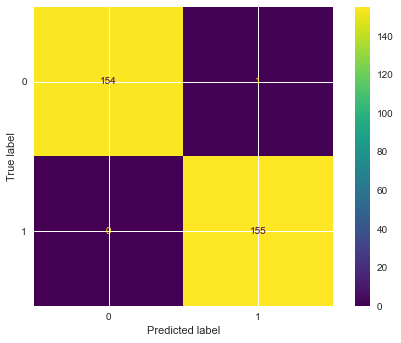

In [592]:
cm_gnb = confusion_matrix(y_train_sm, y_pred_train_gnb)
ConfusionMatrixDisplay(cm_gnb).plot()

In [593]:
#y Predict Datatest
y_test_pred_gnb = gnb.predict(x_test)
print('Score accuracy model gnb(data test) adalah', accuracy_score(y_test, y_test_pred_gnb))

Score accuracy model gnb(data test) adalah 1.0


## Random Forest

In [594]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [595]:
rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [596]:
start = time.time()
y_pred_train_rf = rf.predict(x_train_sm)
end = time.time()
rt_rf = 'Running time Random Forest Model', end-start
print(rt_rf)

('Running time Random Forest Model', 0.018494367599487305)


In [597]:
#Evaluasi model menggunakan metric accuracy score
print('Score accuracy Random Forest adalah', accuracy_score(y_train_sm, y_pred_train_rf))

Score accuracy Random Forest adalah 1.0


In [598]:
#Evaluasi menggunakan classification report
#from sklearn.metrics import classification_report

print('RF Classification Report\n', classification_report(y_train_sm, y_pred_train_rf))

RF Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       155
         1.0       1.00      1.00      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



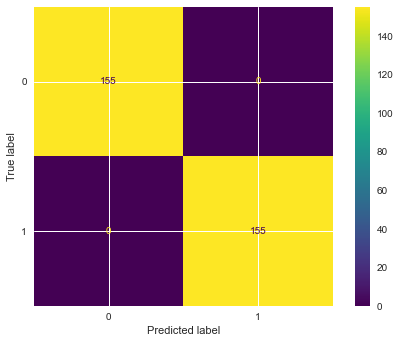

In [599]:
cm_rf = confusion_matrix(y_train_sm, y_pred_train_rf)
ConfusionMatrixDisplay(cm_rf).plot()

In [600]:
#y Predict Datatest
y_test_pred_rf= rf.predict(x_test)
print('Score accuracy model random forest (data test) adalah', accuracy_score(y_test, y_test_pred_rf))

Score accuracy model random forest (data test) adalah 0.9824561403508771


# Summary Evaluation By Classification Report

In [601]:
#Evaluasi menggunakan classification report
from sklearn.metrics import classification_report
print('Logistic Regression Classification Report\n', classification_report(y_train_sm, y_pred_train))
print(rt_lr)
print('=====================================================================================================')
print('KNN Classification Report\n', classification_report(y_train_sm, y_pred_train_knn))
print(rt_KNN)
print('=====================================================================================================')
print('SVM Classification Report\n', classification_report(y_train_sm, y_pred_train_svm))
print(rt_svm)
print('=====================================================================================================')
print('GNB Classification Report\n', classification_report(y_train_sm, y_pred_train_gnb))
print(rt_gnb)
print('=====================================================================================================')
print('RF Classification Report\n', classification_report(y_train_sm, y_pred_train_rf))
print(rt_rf)

Logistic Regression Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       155
         1.0       1.00      1.00      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

('Running time Logistic Regression Model', 0.003273487091064453)
KNN Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       155
         1.0       0.95      0.90      0.92       155

    accuracy                           0.93       310
   macro avg       0.93      0.93      0.93       310
weighted avg       0.93      0.93      0.93       310

('Running time KNN Model', 0.0310976505279541)
SVM Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       155
         1.0       1.00     

In [602]:
pred_prob1 = lr.predict_proba(x_test)
pred_prob2 = knn.predict_proba(x_test)
#pred_prob3 = svm_clf.predict_proba(x_test)
pred_prob4 = gnb.predict_proba(x_test)
pred_prob5 = rf.predict_proba(x_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5)

1.0 0.7134551495016611 0.7134551495016611 0.7134551495016611 0.7134551495016611


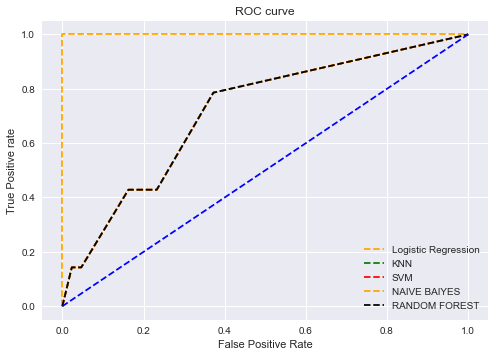

In [603]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVM')
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='NAIVE BAIYES')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='RANDOM FOREST') 

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
# Model Machine Learning terbaik Naive Bayes

In [ ]:
!pip install shap

In [604]:
#import shap
explainer = shap.Explainer(gnb.predict, x_train_sm)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_train_sm)

Permutation explainer: 311it [00:11,  3.76it/s]                                                                        


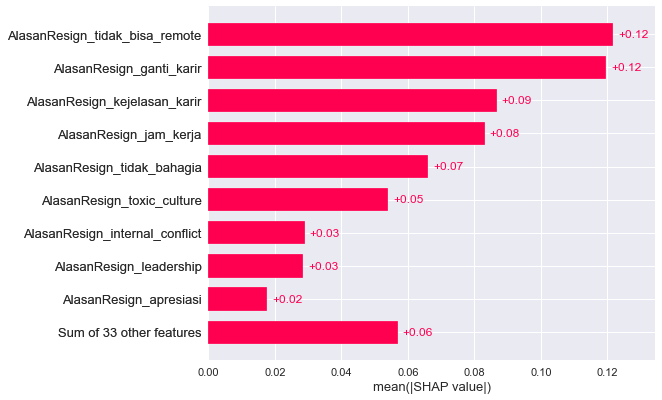

In [605]:
shap.plots.bar(shap_values)

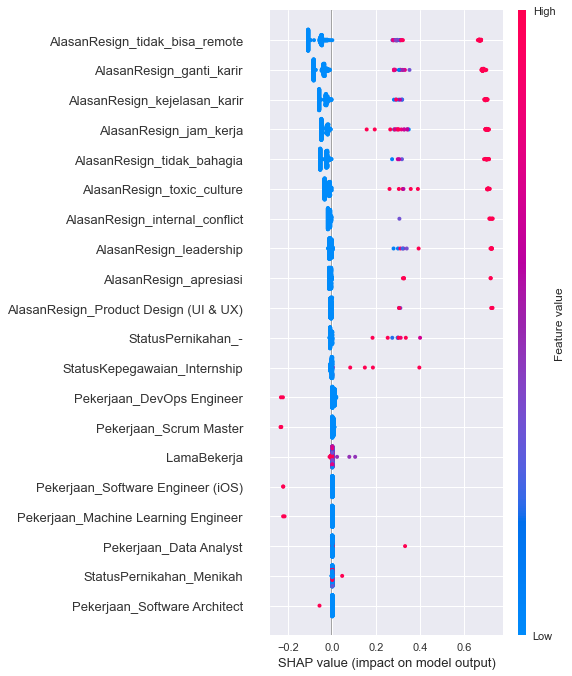

In [606]:
shap.summary_plot(shap_values)

In [ ]:
Insight-Insight :
Para karyawan melakukan resign karena alasan tidak bisa remote, ganti karir, kejelasan karir dan alasan jam kerja berpengaruh cukup besar terhadap keputusan karyawan untuk melakukan resign.
Secara status pekerjaan, internship juga mempengaruhi karyawan melakukan resign dibanding karyawan yang bersatus fulltime dan outsource.
